# 02. Regression
## Homework 2

In [15]:
#Importing necessary libraries for this homework
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# downloading data and saving it locally

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
car_fuel_data = wget.download(url)

print(f"\nFile saved as: {car_fuel_data}")


File saved as: car_fuel_efficiency (2).csv


In [17]:
# Preparing the data
raw_data = pd.read_csv("car_fuel_efficiency.csv") #loading the data
raw_data.info() # investigating basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [18]:
# choosing variables needed for the regression model we want to build
cols = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
data = raw_data[cols]
data.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [19]:
# Checking for missing values
data.isnull().sum()   # calculate how many columns have missing values

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

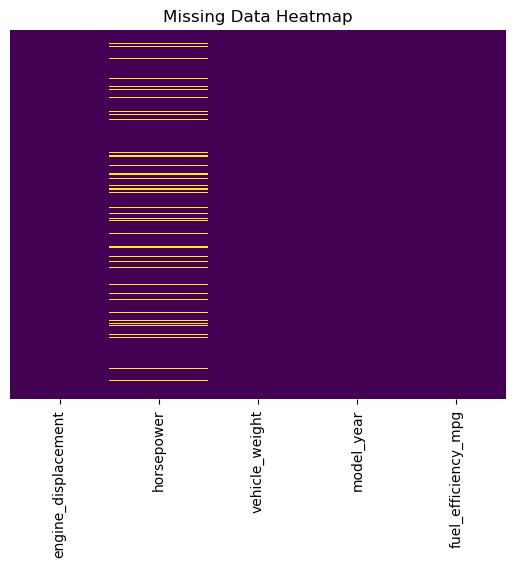

In [20]:
#Visualize the missing values
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')  # use a heatmap to visualise the missing values
plt.title("Missing Data Heatmap")
plt.show()

In [21]:
# central tendancy description
#descriptive statistics
data.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


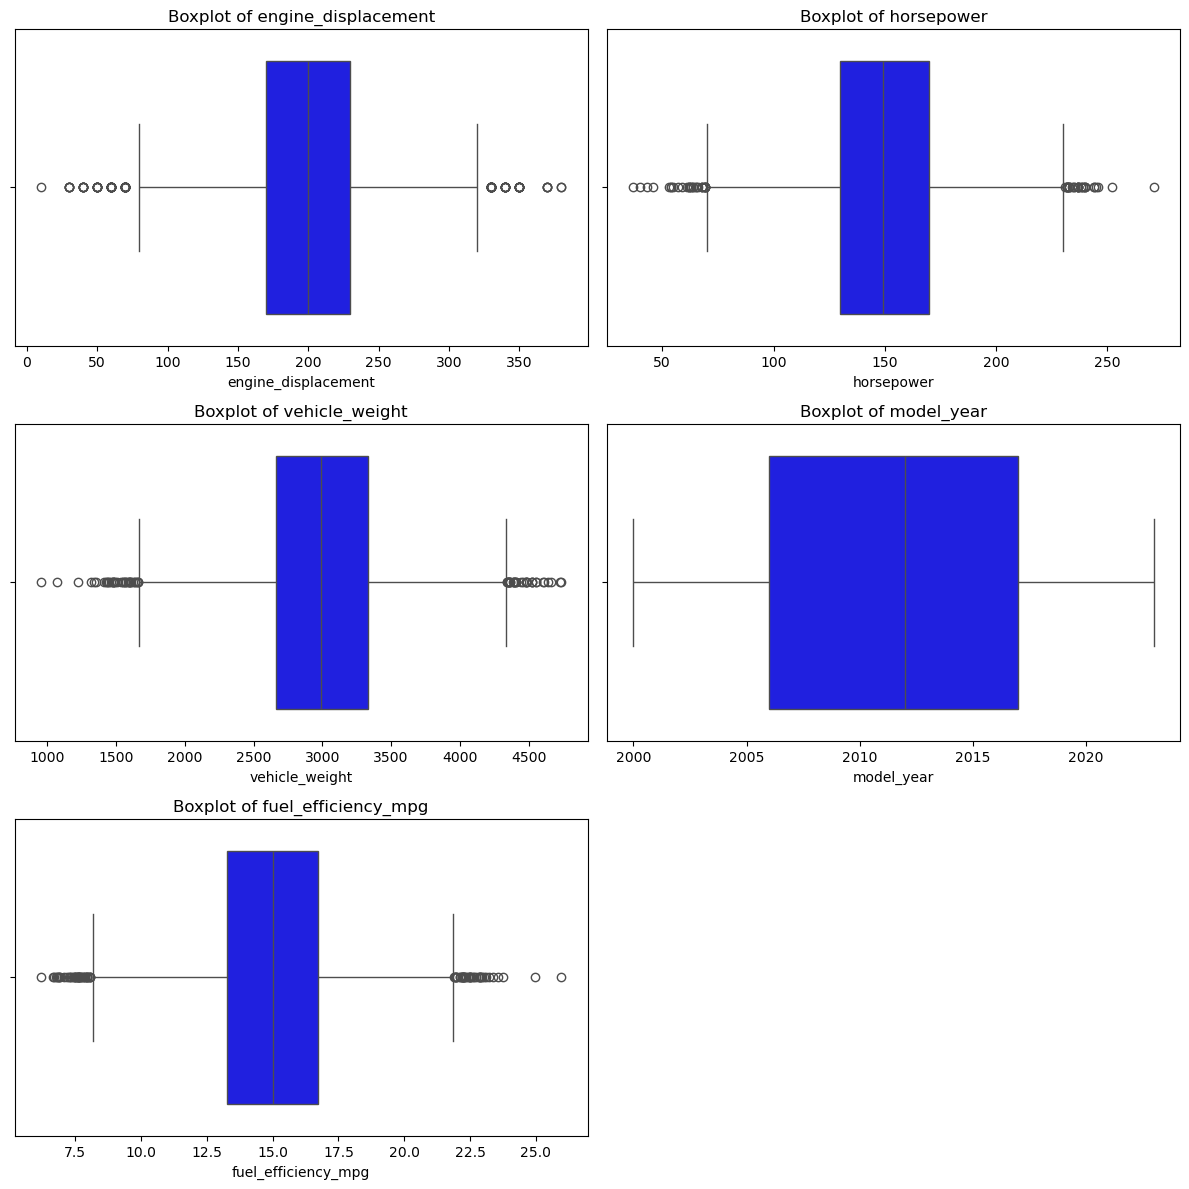

In [22]:
# Get all numerical columns
columns = data.columns
n_vars = len(columns)

# Compute number of rows (2 columns per row)
nrows = (n_vars + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 4 * nrows))
axes = axes.flatten()  # flatten in case of 2D axes array

# Plot each variable's boxplot
for ax, col in zip(axes, columns):
    sns.boxplot(x=data[col], ax=ax, color='blue')
    ax.set_title(f"Boxplot of {col}")
    ax.set_xlabel(col)

# Remove any unused (empty) subplots
for ax in axes[len(columns):]:
    fig.delaxes(ax)

# Adjust layout for readability
plt.tight_layout()
plt.show()


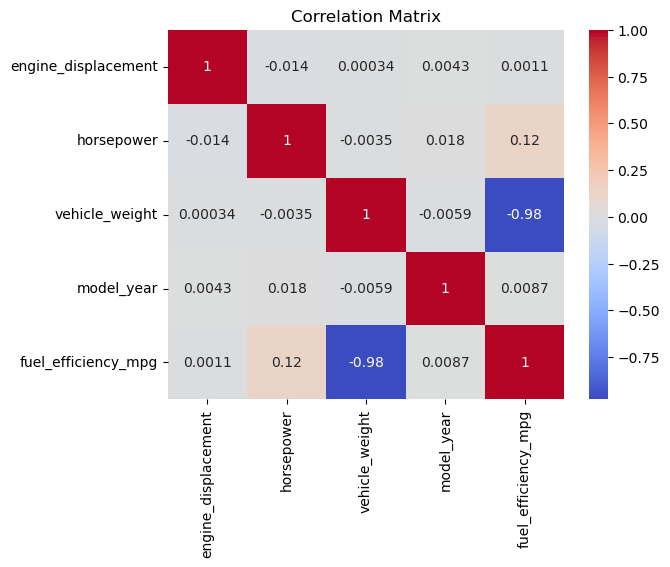

In [23]:
#Correlation analysis
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


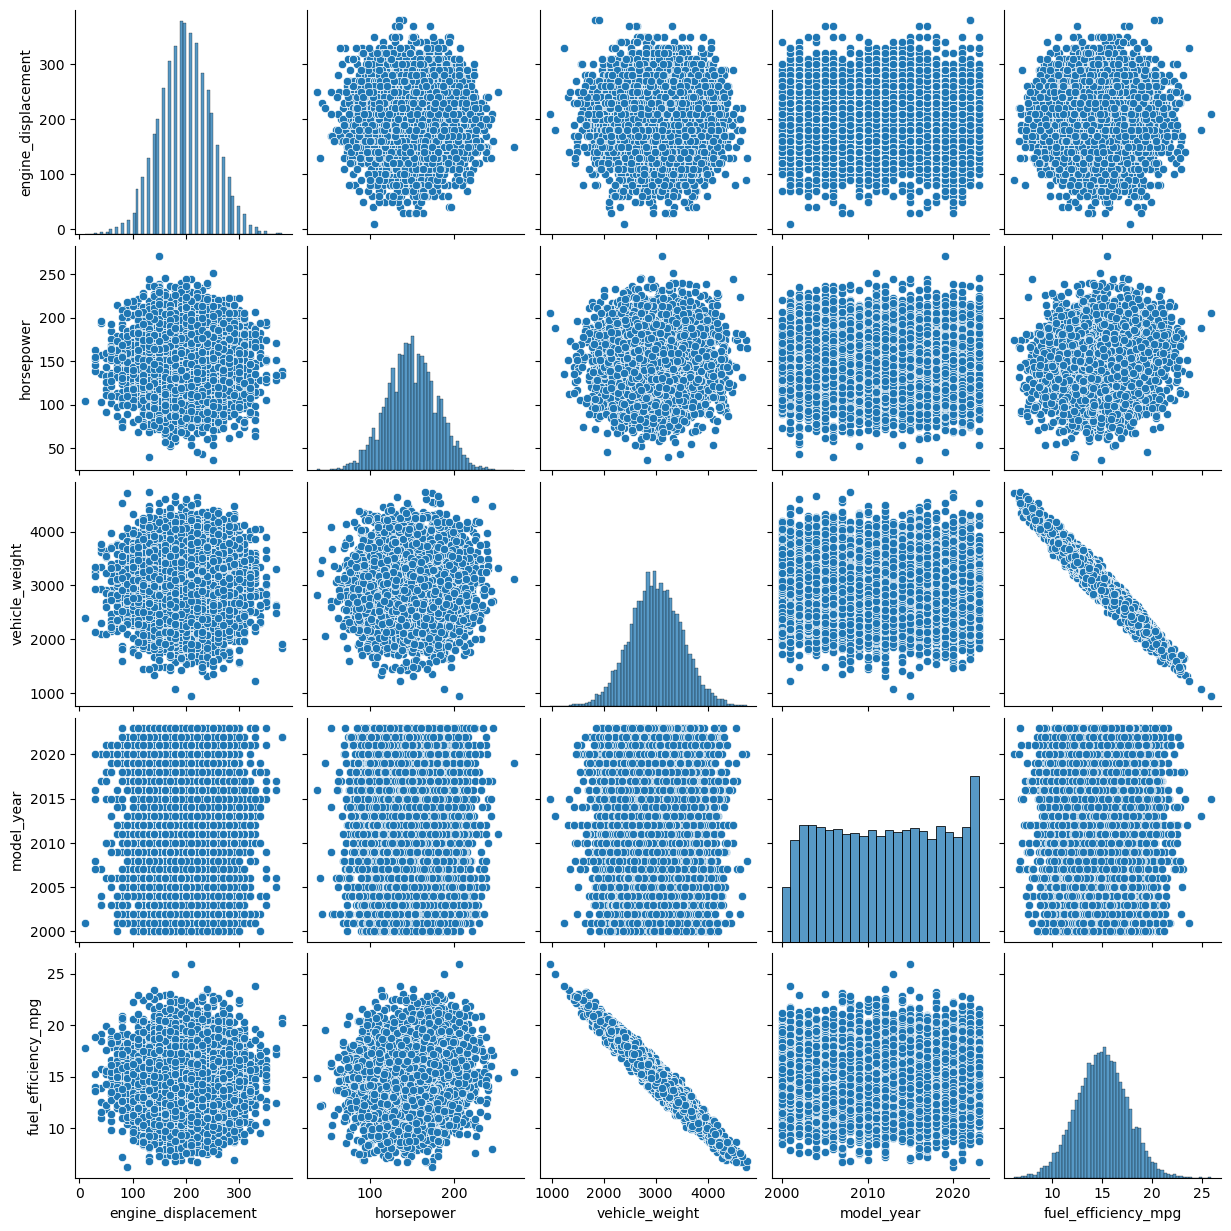

In [24]:
#pairwise scatter plots
sns.pairplot(data)
plt.show()


In [25]:
#splitting the data into train, test and validation datasets

#1. Setting up how many observations in the train, the test and the validation sets
n = len(data)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test
n , n_val+n_test+n_train

(9704, 9704)

In [26]:
# Checking the size of each set
n_val, n_test, n_train

(1940, 1940, 5824)

In [27]:
# shuffe and split the data set
idx = np.arange(n)
idx
 
# to make it reproducible
np.random.seed(42)
np.random.shuffle(idx)

# Create shuffled datasets with correct size
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train + n_val]]
data_test = data.iloc[idx[n_train + n_val:]]

#Reset the data
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [28]:
# A function to prepare data by replacing missing values by 0
def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

In [29]:
# A function to train the a non regularized regressin model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [30]:
# A function to calculate the RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [31]:
# ----------------------------
#  Prepare data
# ----------------------------

# Columns
X_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
y_col = 'fuel_efficiency_mpg'

# Separate features and targets
X_train = data_train[X_cols]
y_train = data_train[y_col].values

X_val = data_val[X_cols]
y_val = data_val[y_col].values

# ----------------------------
# CASE 1: Fill missing horsepower with 0
# ----------------------------

X_train_0 = prepare_X(X_train)
X_val_0 = prepare_X(X_val)

# Train
w0_0, w_0 = train_linear_regression(X_train_0, y_train)

# Predict
y_pred_0 = w0_0 + X_val_0.dot(w_0)

# Evaluate
rmse_0 = rmse(y_val, y_pred_0)
rmse_0 = round(rmse_0, 2)

print(f"RMSE (horsepower filled with 0): {rmse_0}")

# ----------------------------
# CASE 2: Fill missing horsepower with mean (from training set)
# ----------------------------

# Compute mean horsepower from training data only
mean_hp = data_train['horsepower'].mean()

X_train_mean = X_train.fillna({'horsepower': mean_hp})
X_val_mean = X_val.fillna({'horsepower': mean_hp})

X_train_mean = X_train_mean.values
X_val_mean = X_val_mean.values

# Train
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# Predict
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

# Evaluate
rmse_mean = rmse(y_val, y_pred_mean)
rmse_mean = round(rmse_mean, 2)

print(f"RMSE (horsepower filled with mean): {rmse_mean}")

# ----------------------------
# Compare the two missing values handling techniques
# ----------------------------
if rmse_0 < rmse_mean:
    print("Filling missing values with 0 gives better RMSE.")
else:
    print("Filling missing values with the mean gives better RMSE.")


RMSE (horsepower filled with 0): 0.52
RMSE (horsepower filled with mean): 0.46
Filling missing values with the mean gives better RMSE.


In [32]:
# ----------------------------
# Function for regularized linear regression
# ----------------------------
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])  # Regularization term
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


# ----------------------------
# Prepare data (fill NAs with 0 as required)
# ----------------------------
X_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
y_col = 'fuel_efficiency_mpg'

X_train = data_train[X_cols].fillna(0).values
y_train = data_train[y_col].values

X_val = data_val[X_cols].fillna(0).values
y_val = data_val[y_col].values


# ----------------------------
# Train and evaluate models with different r values
# ----------------------------
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    
    se = (y_val - y_pred) ** 2
    mse = se.mean()
    rmse_val = np.sqrt(mse)
    
    rmse_scores[r] = round(rmse_val, 2)
    print(f"r={r:<6} --> RMSE: {rmse_scores[r]}")

# ----------------------------
# Identify the best r
# ----------------------------
best_r = min(rmse_scores, key=rmse_scores.get)
print("\n✅ Best regularization value:")
print(f"r = {best_r}, RMSE = {rmse_scores[best_r]}")


r=0      --> RMSE: 0.52
r=0.01   --> RMSE: 0.52
r=0.1    --> RMSE: 0.52
r=1      --> RMSE: 0.52
r=5      --> RMSE: 0.52
r=10     --> RMSE: 0.52
r=100    --> RMSE: 0.52

✅ Best regularization value:
r = 0, RMSE = 0.52


In [33]:

# Trying different seeds to shuffle the dtaset.
# Seed values to try
seeds = [0,1,2,3,4,5,6,7,8,9]
rmse_scores = []

# Number of samples
n = len(data)

# Train/validation/test split fractions
frac_train, frac_val, frac_test = 0.6, 0.2, 0.2
n_val = n_test =int(frac_val * n)
n_train = n - n_test - n_val

for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # Split the data
    data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
    data_val = data.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
    data_test = data.iloc[idx[n_train + n_val:]].reset_index(drop=True)
    
    # Prepare X and y
    X_train = data_train[X_cols].fillna(0).values
    y_train = data_train[y_col].values
    X_val = data_val[X_cols].fillna(0).values
    y_val = data_val[y_col].values
    
    # Train model
    w0, w = train_linear_regression(X_train, y_train)
    
    # Predict on validation set
    y_pred = w0 + X_val.dot(w)
    
    # Compute RMSE
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

# Compute standard deviation of RMSE scores
std_rmse = round(np.std(rmse_scores), 3)
print("RMSE scores for each seed:", [round(s,3) for s in rmse_scores])
print("Standard deviation of RMSE:", std_rmse)


RMSE scores for each seed: [0.521, 0.521, 0.523, 0.516, 0.511, 0.528, 0.531, 0.509, 0.515, 0.513]
Standard deviation of RMSE: 0.007


In [34]:
# ----------------------------
# Split the dataset (seed = 9)
# ----------------------------
np.random.seed(9)
n = len(data)
idx = np.arange(n)
np.random.shuffle(idx)

# 60% / 20% / 20%
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
data_val   = data.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
data_test  = data.iloc[idx[n_train + n_val:]].reset_index(drop=True)

# ----------------------------
# Combine train + validation
# ----------------------------
data_full_train = pd.concat([data_train, data_val]).reset_index(drop=True)

# ----------------------------
# Prepare X and y (fill NAs with 0)
# ----------------------------
X_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
y_col  = 'fuel_efficiency_mpg'

X_full_train = data_full_train[X_cols].fillna(0).values
y_full_train = data_full_train[y_col].values

X_test = data_test[X_cols].fillna(0).values
y_test = data_test[y_col].values

# ----------------------------
# Train the model (r = 0.001)
# ----------------------------
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# ----------------------------
# Evaluate on test set
# ----------------------------
y_pred = w0 + X_test.dot(w)
test_rmse = rmse(y_test, y_pred)
print(f"Test RMSE: {round(test_rmse, 3)}")


Test RMSE: 0.516
